In [ ]:
pip install fredapi

Mean is 9.665120643431635
Standard deviation is 9.513145025616755


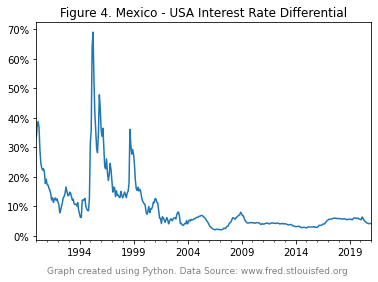

In [24]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statistics

# Add API key
fred = Fred(api_key='78d242620c9f4651bfbbfc09b39988a8')

# Get the T-bill interest rate data for desired countries
mexico_tbill_rates = fred.get_series('INTGSTMXM193N')
usa_tbill_rates = fred.get_series('INTGSTUSM193N')

# Concatenate the data into one data frame and assign columns
df = pd.concat([mexico_tbill_rates, usa_tbill_rates], axis=1)
df.columns = ['Mexico', 'USA']

# Filter for the time period
df = df['1990-01-01':'2021-01-01']

# Calculate the differential between the two countries
df['Differential'] = df['Mexico'] - df['USA']

# Add a title
plt.title('Figure 4. Mexico - USA Interest Rate Differential')

# Add a footnote below x-axis
text = ('Graph created using Python. Data Source: www.fred.stlouisfed.org ')
plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=9, color='grey')

# Format y-axis as a percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

# Plot the data
df['Differential'].plot()

# Save the table
plt.savefig('mexico_usa_interest_differentials.png')

# Print the mean and standard deviation of the differential
mean = statistics.mean(df['Differential'])
print("Mean is", mean)
std = statistics.stdev(df['Differential'])
print("Standard deviation is", std)

